In [4]:
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


2024-05-07 00:10:00.586229: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 00:10:00.593917: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 00:10:00.689974: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 00:10:02.401344: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


inside py1


In [5]:
data_train_path = "./shapes/train"
data_test_path = "./shapes/test"
data_val_path = "./shapes/validation"

inside py 2


In [6]:
img_width = 180
img_height = 180

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path,
                                                         shuffle=True,
                                                         image_size=(img_width,img_height),
                                                         batch_size=32,
                                                         validation_split=False )

Found 300 files belonging to 6 classes.


In [8]:
data_cat = data_train.class_names

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                         shuffle=False,
                                                         image_size=(img_width,img_height),
                                                         batch_size=32,
                                                         validation_split=False )

Found 180 files belonging to 6 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                         shuffle=False,
                                                         image_size=(img_width,img_height),
                                                         batch_size=32,
                                                         validation_split=False )

Found 90 files belonging to 3 classes.


2024-05-07 00:10:30.232525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


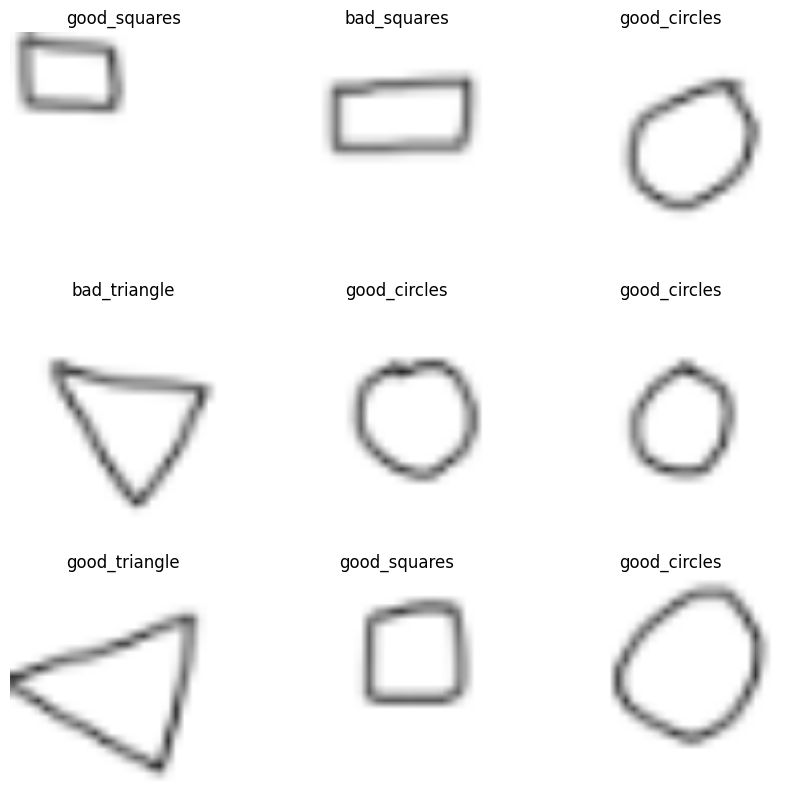

In [11]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [18]:
epochs_size = 35
history = model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 509ms/step - accuracy: 0.1978 - loss: 2.5425 - val_accuracy: 0.2833 - val_loss: 1.6869
Epoch 2/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 444ms/step - accuracy: 0.2444 - loss: 1.6644 - val_accuracy: 0.2833 - val_loss: 1.6985
Epoch 3/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 427ms/step - accuracy: 0.3087 - loss: 1.6322 - val_accuracy: 0.2778 - val_loss: 1.6603
Epoch 4/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 407ms/step - accuracy: 0.2678 - loss: 1.6325 - val_accuracy: 0.2833 - val_loss: 1.6186
Epoch 5/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 405ms/step - accuracy: 0.3266 - loss: 1.6037 - val_accuracy: 0.3167 - val_loss: 1.6015
Epoch 6/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 411ms/step - accuracy: 0.3665 - loss: 1.5309 - val_accuracy: 0.4056 - val_loss: 1.5256
Epoch 7/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 406ms/step - accuracy: 0.4359 - loss: 1.4200 - val_accuracy: 0.4611 - val_loss: 1.4428
Epoch 8/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 0.4988 - loss: 1.3582 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss')

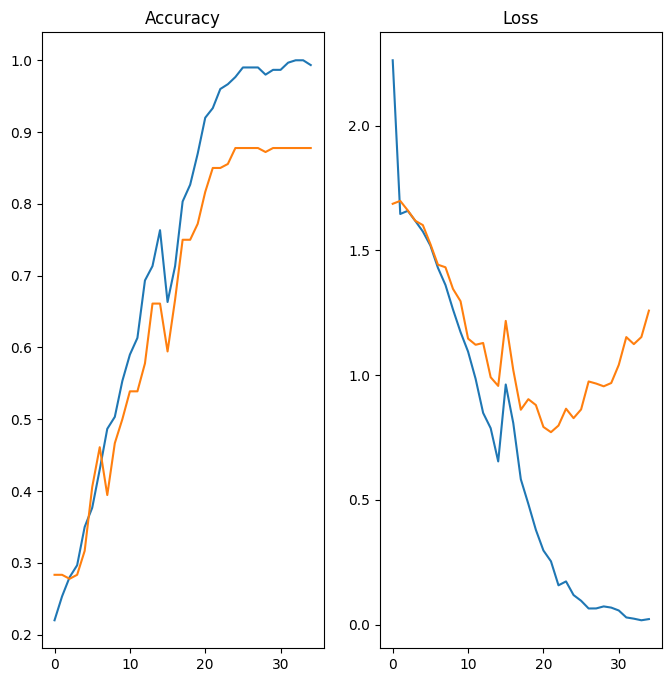

In [19]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')


In [22]:
image = "./drawing(5).png"
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [23]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [24]:
score = tf.nn.softmax(predict)

In [25]:
print("Shape is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)],np.max(score*100)))
type = data_cat[np.argmax(score)]

Shape is good_squares with accuracy of 74.99


In [26]:
if(type == "good_triangle" or type == "good_circles" or type == "good_squares"):
    print(" No chances of fine motor skill developmental delay")
else:
    print("Chances of fine motor skill developmental delay")

 No chances of fine motor skill developmental delay


In [32]:
model.save("cnn_model.h5")

In [33]:
image = "./drawing(5).png"
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [34]:
new_model = keras.models.load_model("cnn_model.h5")
predict_new = new_model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


In [36]:
new_score = tf.nn.softmax(predict_new)

In [37]:
print("Shape is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(new_score)],np.max(new_score*100)))
type = data_cat[np.argmax(new_score)]

Shape is good_squares with accuracy of 74.99
